In [ ]:
import pandas as pd
import openpyxl
import os

## Преобразование неструктурированной информации со всех листов из всех файлов, находящихся в папке, в табличный формат

## Алтухов Николай

#### Я сделал тестовый пример таких данных:
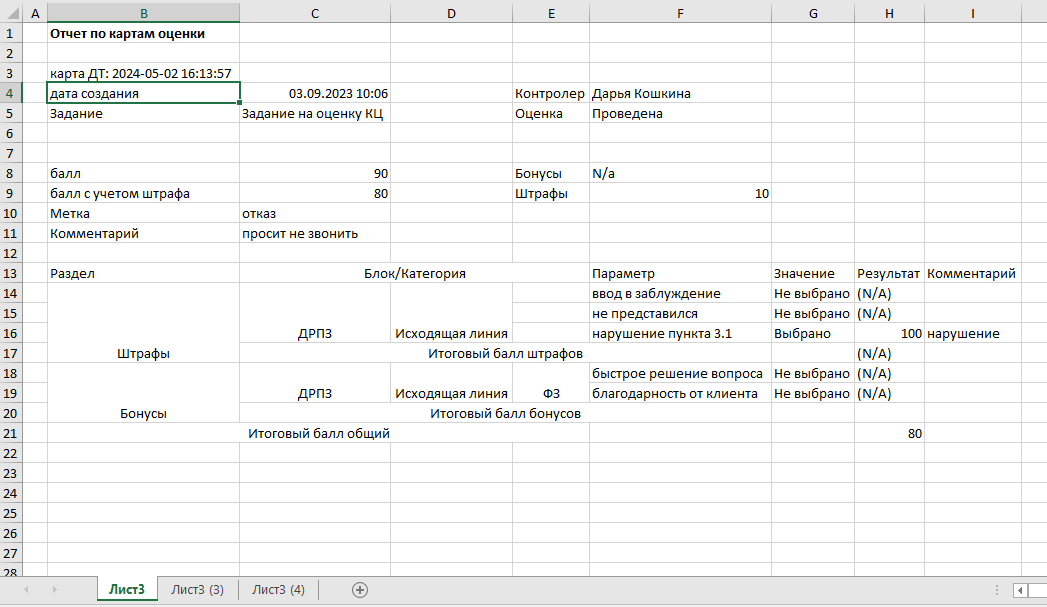

#### На первом листе в каждом файле указано название отчета, из-за чего ячейки с информацией на первом листе сдвинуты вниз, учтем это при преобразовании в табличный формат


In [2]:
all_file_frames = []
folder_path = 'тест'

# Проходим по всем файлам в папке
for filename in os.listdir(folder_path):
    if filename.endswith('.xlsx'):
        file_path = os.path.join(folder_path, filename)
        workbook = openpyxl.load_workbook(file_path, data_only=True)
        
        
        for sheet_name in workbook.sheetnames:
            if sheet_name == workbook.sheetnames[0]:
                df = pd.DataFrame()
                sheet = workbook[sheet_name]
                date_of_call = sheet['B3'].value
                date_of_sozd = sheet['C4'].value
                expert = sheet['F4'].value
                bonuses = sheet['F8'].value
                status = sheet['F5'].value
                shtrafs_ball = sheet['F9'].value
                task_name = sheet['C5'].value
                rating = sheet['C9'].value
                label = sheet['C10'].value
                comment = sheet['C11'].value
                
                new_row = pd.DataFrame({
                    'БН ДН ДТ': [date_of_call],
                    'Балл штрафов': [shtrafs_ball],
                    'Контролер': [expert],
                    'Название задания': [task_name],
                    'Балл': [rating],
                    'Метка': [label],
                    'Общий комментарий': [comment],
                    'Статус оценки': [status],
                    'Бонусы': [bonuses],
                    'Дата создания': [date_of_sozd]
                })

                df = pd.concat([df, new_row], ignore_index=True)



                last_row = None
                for cell in sheet['B']:
                    if cell.value is not None:
                        last_row = cell.row
                # Определяем диапазон ячеек с таблицей
                table_range = sheet['B13':f'I{last_row}']

                # Создаем пустой список для данных
                data = []

                # Проходим по ячейкам в диапазоне и добавляем их значения в список
                for row in table_range:
                    row_data = [cell.value for cell in row]
                    data.append(row_data)

                # Преобразуем список в DataFrame
                table = pd.DataFrame(data, columns=['Раздел', 'Блок1', 'Блок2', 'Категория', 'Параметр', 'Значение', 'Результат', 'Комментарий к элементу шаблона'])

                rows_with_itog = table[table['Блок1'].str.contains('итог', case=False, na=False)|table['Раздел'].str.contains('итог', case=False, na=False)|table['Параметр'].str.contains('итого по', case=False, na=False)]

                # Установить значения n/a для всех столбцов в найденных строках
                table.loc[rows_with_itog.index, :] = 'n/a'
                table[['Раздел','Блок1', 'Блок2','Категория']] = table[['Раздел','Блок1', 'Блок2','Категория']].ffill()
                #table = table[(table['Раздел'] != 'n/a') & (table['Параметр'] != 'n/a')]
                #table = table[table['Результат']!="(N/A)"]
                table.iloc[0] = '_'
                df['key'] = 0
                table['key'] = 0
                merged = pd.merge(df, table, on='key')
                merged =  merged.drop(columns='key')
                merged = merged[(merged['Раздел']!='_')&(merged['Раздел']!='n/a')]
                all_file_frames.append(merged)
                
                
            else:
                df = pd.DataFrame()
                sheet = workbook[sheet_name]
                date_of_call = sheet['B2'].value
                date_of_sozd = sheet['C3'].value
                expert = sheet['F3'].value
                bonuses = sheet['F7'].value
                status = sheet['F4'].value
                shtrafs_ball = sheet['F8'].value
                task_name = sheet['C4'].value
                rating = sheet['C8'].value
                label = sheet['C9'].value
                comment = sheet['C10'].value
                
                new_row = pd.DataFrame({
                    'БН ДН ДТ': [date_of_call],
                    'Балл штрафов': [shtrafs_ball],
                    'Контролер': [expert],
                    'Название задания': [task_name],
                    'Балл': [rating],
                    'Метка': [label],
                    'Общий комментарий': [comment],
                    'Статус оценки': [status],
                    'Бонусы': [bonuses],
                    'Дата создания': [date_of_sozd]
                })

                df = pd.concat([df, new_row], ignore_index=True)
                
                last_row = None
                for cell in sheet['B']:
                    if cell.value is not None:
                        last_row = cell.row
                # Определяем диапазон ячеек с таблицей
                table_range = sheet['B12':f'I{last_row}']

                # Создаем пустой список для данных
                data = []

                # Проходим по ячейкам в диапазоне и добавляем их значения в список
                for row in table_range:
                    row_data = [cell.value for cell in row]
                    data.append(row_data)

                # Преобразуем список в DataFrame
                table = pd.DataFrame(data, columns=['Раздел', 'Блок1', 'Блок2', 'Категория', 'Параметр', 'Значение', 'Результат', 'Комментарий к элементу шаблона'])

                rows_with_itog = table[table['Блок1'].str.contains('итог', case=False, na=False)|table['Раздел'].str.contains('итог', case=False, na=False)|table['Параметр'].str.contains('итого по', case=False, na=False)]

                
                table.loc[rows_with_itog.index, :] = 'n/a'
                table[['Раздел','Блок1', 'Блок2','Категория']] = table[['Раздел','Блок1', 'Блок2','Категория']].ffill()
                table.iloc[0] = '_'
                df['key'] = 0
                table['key'] = 0
                merged = pd.merge(df, table, on='key')
                merged =  merged.drop(columns='key')
                merged = merged[(merged['Раздел']!='_')&(merged['Раздел']!='n/a')]
                

                all_file_frames.append(merged)
big_df = pd.concat(all_file_frames,axis=0, ignore_index=True)


    


In [3]:
big_df

,БН ДН ДТ,Балл штрафов,Контролер,Название задания,Балл,Метка,Общий комментарий,Статус оценки,Бонусы,Дата создания,Раздел,Блок1,Блок2,Категория,Параметр,Значение,Результат,Комментарий к элементу шаблона
0,карта ДТ: 2024-05-02 16:13:57,10,Дарья Кошкина,Задание на оценку КЦ,80,отказ,просит не звонить,Проведена,N/a,2023-09-03 10:06:46,Штрафы,ДРПЗ,Исходящая линия,None,ввод в заблуждение,Не выбрано,(N/A),None
1,карта ДТ: 2024-05-02 16:13:57,10,Дарья Кошкина,Задание на оценку КЦ,80,отказ,просит не звонить,Проведена,N/a,2023-09-03 10:06:46,Штрафы,ДРПЗ,Исходящая линия,None,не представился,Не выбрано,(N/A),None
2,карта ДТ: 2024-05-02 16:13:57,10,Дарья Кошкина,Задание на оценку КЦ,80,отказ,просит не звонить,Проведена,N/a,2023-09-03 10:06:46,Штрафы,ДРПЗ,Исходящая линия,None,нарушение пункта 3.1,Выбрано,100,нарушение
3,карта ДТ: 2024-05-02 16:13:57,10,Дарья Кошкина,Задание на оценку КЦ,80,отказ,просит не звонить,Проведена,N/a,2023-09-03 10:06:46,Бонусы,ДРПЗ,Исходящая линия,ФЗ,быстрое решение вопроса,Не выбрано,(N/A),None
4,карта ДТ: 2024-05-02 16:13:57,10,Дарья Кошкина,Задание на оценку КЦ,80,отказ,просит не звонить,Проведена,N/a,2023-09-03 10:06:46,Бонусы,ДРПЗ,Исходящая линия,ФЗ,благодарность от клиента,Не выбрано,(N/A),None
5,карта ДТ: 2023-09-02 13:37:57,N/a,Сидоров Иван,задание на оценку КЦ,100,а-а,автоответчик,Проведена,N/a,2024-02-03 12:04:53,Штрафы,ДРПЗ,Исходящая линия,None,ввод в заблуждение,Не выбрано,(N/A),None
6,карта ДТ: 2023-09-02 13:37:57,N/a,Сидоров Иван,задание на оценку КЦ,100,а-а,автоответчик,Проведена,N/a,2024-02-03 12:04:53,Штрафы,ДРПЗ,Исходящая линия,None,не представился,Не выбрано,(N/A),None
7,карта ДТ: 2023-09-02 13:37:57,N/a,Сидоров Иван,задание на оценку КЦ,100,а-а,автоответчик,Проведена,N/a,2024-02-03 12:04:53,Штрафы,ДРПЗ,Исходящая линия,None,нарушение пункта 3.1,Выбрано,100,None
8,карта ДТ: 2023-09-02 13:37:57,N/a,Сидоров Иван,задание на оценку КЦ,100,а-а,автоответчик,Проведена,N/a,2024-02-03 12:04:53,Бонусы,ДРПЗ,Исходящая линия,ФЗ,быстрое решение вопроса,Не выбрано,(N/A),None
9,карта ДТ: 2023-09-02 13:37:57,N/a,Сидоров Иван,задание на оценку КЦ,100,а-а,автоответчик,Проведена,N/a,2024-02-03 12:04:53,Бонусы,ДРПЗ,Исходящая линия,ФЗ,благодарность от клиента,Не выбрано,(N/A),None


## Преобразование выполнено успешно